<a href="https://colab.research.google.com/github/Ambaright/ST-554-Homework-4/blob/main/Baright_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Amanda Baright

Date: 02.10.2026

Purpose: ST 554 Homework 4

# Summarizing Student Data Graphically

For this part, we’ll revisit the `StudentData.txt` data that comes from the UCI machine learning repository. The dataset is generally about math scores (G1, G2, G3) for students from two different schools. They also measure a bunch of things about the students’ home life.



## Bringing in Homework 3 Code

Here we start with reading in the data.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_data = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", sep = ";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


One thing, that I'm going to do differently here in Homework 4 is convert my categorical variables into category type variable. One way I can do this is using the `.apply()` method with a `lambda` function.

In [104]:
#Convert four categorical variables into cateogry type variables
student_data[["school", "address", "higher", "Pstatus"]] = student_data[["school","address", "higher", "Pstatus"]]\
    .apply(lambda x: x.astype("category"))

#Rename these categories so they can be easier to interpret
student_data.address = student_data.address.cat.rename_categories(["Rural", "Urban"])
student_data.higher = student_data.higher.cat.rename_categories(["No", "Yes"])
student_data.Pstatus = student_data.Pstatus.cat.rename_categories(["Apart", "Together"])

### Categorical Variables

#### Contingency Tables

First, we'll create a one-way contingency table, a two-way contingency table, and a three-way contingency table. For each, we'll interpret a number from the resulting table.

Starting with the one-way contingency table, we may want to examine the breakdown of the student's address (rural vs urban).

In [105]:
student_data.address.value_counts()

,count
address,
Urban,307
Rural,88


Here we see that there are 88 students out of the two schools that live in a Rural address.

Now for our two-way contingency table, we may want to see the relationship between where a student lives and their desire to attend higher education.

In [125]:
address_higher_table = pd.crosstab(
    student_data.address,
    student_data.higher
)
address_higher_table

higher,No,Yes
address,,
Rural,6,82
Urban,14,293


Here we see that of the 88 students who live in a Rural address, 82 of them want to attend higher education.

Now for the three-way contingency table, we may want to examine the relationship between where a student lives and their desire to attend higher education with the parental status (i.e. are the parents together or apart).

In [107]:
student_three_way = pd.crosstab(
    [student_data.address, student_data.higher],
    student_data.Pstatus,
    margins = True
)
student_three_way

Pstatus         Apart  Together  All
address higher                      
Rural   No          1         5    6
        Yes         6        76   82
Urban   No          0        14   14
        Yes        34       259  293
All                41       354  395

Here we see that of the 82 Rural students that want to attend higher education, 76 of them have parents who are together.

#### Conditional Tables

Create a conditional two-way table. That is, condition on one variable’s setting and create a two-way
table.

The first method, will be done by subsetting the data (say with `.loc`) and then creating the two-way table. Here, we subset the `student_data` by only including students whose parents are together. We then create our two-way table for the `address` and `higher` variables.

In [108]:
student_Ptogether = student_data.loc[student_data.Pstatus == "Together"]
pd.crosstab(
    student_Ptogether.address,
    student_Ptogether.higher,
    margins = True
)

higher,No,Yes,All
address,,,
Rural,5,76,81
Urban,14,259,273
All,19,335,354


We can create another conditional two-way table by creating a three-way table and subsetting it. Here we use the `student_three_way` table from before, and subset it using `.loc()`.

In [109]:
student_three_way.loc[:,"Together"]

address  higher
Rural    No          5
         Yes        76
Urban    No         14
         Yes       259
All                354
Name: Together, dtype: int64

### Numeric Variables (and across groups)

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

We want to find measures of center and spread for three of these variables (including G3 as one of them).


In [110]:
# Numeric Summaries for Age
student_data.agg(minAge = ("age", "min"),
                 q1Age = ("age", lambda x: x.quantile(0.25)),
                 meanAge = ("age", "mean"),
                 medianAge = ("age", "median"),
                 q3Age = ("age", lambda x: x.quantile(0.75)),
                 maxAge = ("age", "max"),
                 stdAge = ("age", "std")
                 )

,age
minAge,15.000000
q1Age,16.000000
meanAge,16.696203
medianAge,17.000000
q3Age,18.000000
maxAge,22.000000
stdAge,1.276043


In [111]:
# Numeric Summaries for Absences
student_data.agg(minAbs = ("absences", "min"),
                 q1Abs = ("absences", lambda x: x.quantile(0.25)),
                 meanAbs = ("absences", "mean"),
                 medianAbs = ("absences", "median"),
                 q3Abs = ("absences", lambda x: x.quantile(0.75)),
                 maxAbs = ("absences", "max"),
                 stdAbs = ("absences", "std")
                 )

,absences
minAbs,0.000000
q1Abs,0.000000
meanAbs,5.708861
medianAbs,4.000000
q3Abs,8.000000
maxAbs,75.000000
stdAbs,8.003096


In [112]:
# Numeric Summaries for G3
student_data.agg(minG3 = ("G3", "min"),
                 q1G3 = ("G3", lambda x: x.quantile(0.25)),
                 meanG3 = ("G3", "mean"),
                 medianG3 = ("G3", "median"),
                 q3G3 = ("G3", lambda x: x.quantile(0.75)),
                 maxG3 = ("G3", "max"),
                 stdG3 = ("G3", "std")
                 )

,G3
minG3,0.000000
q1G3,8.000000
meanG3,10.415190
medianG3,11.000000
q3G3,14.000000
maxG3,20.000000
stdG3,4.581443


We now repeat while subsetting the data by some grouping variable (say with `.loc`). Here we'll repeat by using `higher` as the grouping variable, as we may want to see the summaries for those who want to attend higher education.


In [113]:
# Numeric Summary for Age and for students who want higher ed
student_data.loc[student_data['higher'] == "Yes"]\
    .agg(minAge = ("age", "min"),
                 q1Age = ("age", lambda x: x.quantile(0.25)),
                 meanAge = ("age", "mean"),
                 medianAge = ("age", "median"),
                 q3Age = ("age", lambda x: x.quantile(0.75)),
                 maxAge = ("age", "max"),
                 stdAge = ("age", "std")
                 )

,age
minAge,15.000000
q1Age,16.000000
meanAge,16.634667
medianAge,17.000000
q3Age,18.000000
maxAge,21.000000
stdAge,1.244184


In [114]:
# Numeric Summary for Absences for students who want to attend higher ed
student_data.loc[student_data['higher'] == "Yes"]\
    .agg(minAbs = ("absences", "min"),
                 q1Abs = ("absences", lambda x: x.quantile(0.25)),
                 meanAbs = ("absences", "mean"),
                 medianAbs = ("absences", "median"),
                 q3Abs = ("absences", lambda x: x.quantile(0.75)),
                 maxAbs = ("absences", "max"),
                 stdAbs = ("absences", "std")
                 )

,absences
minAbs,0.000000
q1Abs,0.000000
meanAbs,5.605333
medianAbs,4.000000
q3Abs,8.000000
maxAbs,56.000000
stdAbs,7.254648


In [115]:
# Numeric Summary for G3 for students who want to attend higher ed
student_data.loc[student_data['higher'] == "Yes"]\
    .agg(minG3 = ("G3", "min"),
                 q1G3 = ("G3", lambda x: x.quantile(0.25)),
                 meanG3 = ("G3", "mean"),
                 medianG3 = ("G3", "median"),
                 q3G3 = ("G3", lambda x: x.quantile(0.75)),
                 maxG3 = ("G3", "max"),
                 stdG3 = ("G3", "std")
                 )

,G3
minG3,0.000000
q1G3,9.000000
meanG3,10.608000
medianG3,11.000000
q3G3,14.000000
maxG3,20.000000
stdG3,4.493422


Here we see that the subsetted summaries only shift slighly without the inclusion of those who don't want to attend higher education.

Now we want to find measures of center and spread across a single grouping variable for three of these variables
(including G3 as one of them). Here we'll group by `address`.

In [116]:
# Numeric Summaries for Age with address grouping
pd.pivot_table(student_data, values = "age", index = "address",
               aggfunc = ["min", "mean", "median", "max", "std"], observed = True)

,min,mean,median,max,std
,age,age,age,age,age
address,,,,,
Rural,15,17.045455,17.0,21,1.276751
Urban,15,16.596091,16.0,22,1.260142


In [117]:
# Numeric Summaries for Absences with address grouping
pd.pivot_table(student_data, values = "absences", index = "address",
               aggfunc = ["min", "mean", "median", "max", "std"], observed = True)

,min,mean,median,max,std
,absences,absences,absences,absences,absences
address,,,,,
Rural,0,6.125000,4.0,75,9.574646
Urban,0,5.589577,4.0,56,7.506051


In [118]:
# Numeric Summaries for G3 with address grouping
pd.pivot_table(student_data, values = "G3", index = "address", aggfunc = ["min", "mean", "median", "max", "std"], observed=True)

,min,mean,median,max,std
,G3,G3,G3,G3,G3
address,,,,,
Rural,0,9.511364,10.0,19,4.556149
Urban,0,10.674267,11.0,20,4.563075


Now we want to find measures of center and spread across two grouping variables for three of these variables (including
G3 as one of them).

Here we'll again group by `address`, but will also include `Pstatus`. Below we see that the age summary statistics for Parental Status and Address are quite similar.


In [119]:
# Numeric Summaries for Age with address and Pstatus grouping
pd.crosstab(
    student_data.address,
    student_data.Pstatus,
    values = student_data.age,
    aggfunc = ["min", "mean", "median", "max", "std"]
)

min                mean            median            max           \
Pstatus Apart Together      Apart   Together  Apart Together Apart Together   
address                                                                       
Rural      16       15  17.571429  17.000000   18.0     17.0    19       21   
Urban      15       15  16.382353  16.622711   16.0     16.0    20       22   

              std            
Pstatus     Apart  Together  
address                      
Rural    0.975900  1.294218  
Urban    1.435792  1.236901

Here we see that the absences summary statistics for Parental Status and Address are quite different among the address groups and among the parental status within each address group. It appears that for rural addresses, students whose parents are apart have a higher average, median, and max for absences. However, it should be noted that this groups standard deviation is quite large, compared to the other groups.

In [120]:
# Numeric Summaries for Absences with address and Pstatus grouping
pd.crosstab(
    student_data.address,
    student_data.Pstatus,
    values = student_data.absences,
    aggfunc = ["min", "mean", "median", "max", "std"]
)

min                mean           median            max           \
Pstatus Apart Together      Apart  Together  Apart Together Apart Together   
address                                                                      
Rural       0        0  16.142857  5.259259    7.0      4.0    75       40   
Urban       0        0   7.382353  5.366300    6.0      3.0    30       56   

               std            
Pstatus      Apart  Together  
address                       
Rural    26.403463  6.153815  
Urban     7.401944  7.502296

Below we see that across the grouping of `address` and `Pstatus` the students have similar summary statistics for their `G3`, or final grade.

In [121]:
# Numeric Summaries for G3 with address and Pstatus grouping
pd.crosstab(
    student_data.address,
    student_data.Pstatus,
    values = student_data.G3,
    aggfunc = ["min", "mean", "median", "max", "std"]
)

min                mean            median            max           \
Pstatus Apart Together      Apart   Together  Apart Together Apart Together   
address                                                                       
Rural       9        0  12.714286   9.234568   13.0     10.0    17       19   
Urban       0        0  10.882353  10.648352   11.0     11.0    19       20   

              std            
Pstatus     Apart  Together  
address                      
Rural    2.751623  4.586043  
Urban    4.511028  4.577053

Now we want to create a correlation matrix between all of the numeric variables.

In [122]:
student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


## Task 1: Visualizations of Student Data

We first want to create some visualizations for our categorical variables.

### Categorical Variables

We first want to create a stacked bar graph. We may want to visually examine the relationship between where a student lives and their desire for higher education.

Text(0.5, 1.0, 'Stacked Bar Graph of Address and Desire for Higher Education')

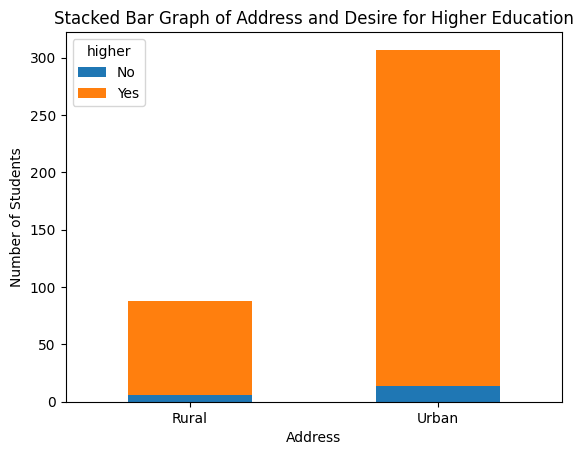

In [130]:
address_higher_table.plot.bar(stacked = True, rot = 0)
plt.xlabel("Address")
plt.ylabel("Number of Students")
plt.title("Stacked Bar Graph of Address and Desire for Higher Education")

From the stacked bar graph, we can see that a majority of students live in an urban area. Additionally, we see that regardless of where a student lives, there is a high proportion of students who desire to attend higher education.

Now we want to examine a side-by-side bar graph. This time we may want to examine a different table that looks at Parental Status and wanting to achieve higher education.

In [128]:
pstatus_higher_table = pd.crosstab(
    student_data.Pstatus,
    student_data.higher
)
pstatus_higher_table

higher,No,Yes
Pstatus,,
Apart,1,40
Together,19,335


Text(0.5, 1.0, 'Side-by-side Bar Graph of Parental Status and Desire for Higher Education')

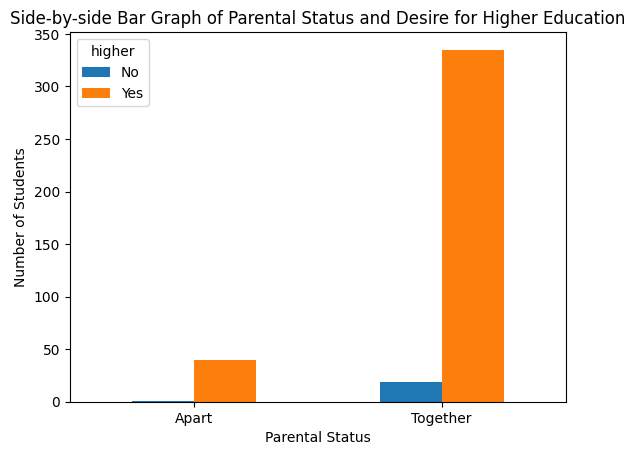

In [131]:
pstatus_higher_table.plot.bar(rot = 0)
plt.xlabel("Parental Status")
plt.ylabel("Number of Students")
plt.title("Side-by-side Bar Graph of Parental Status and Desire for Higher Education")

From the side-by-side bar graph we see that most of the students have parents that live together. However, we see that of the students who have parents living together, we see that a noticeable amount of students do not have a desire for higher education. Whereas, for students who have parents living apart, almost all of the students do have a desire for higher education.

### Numeric Variables (and across groups)

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3)

#### Histogram

First we will start with creating a histogram to investigate the relationship between age and a desire for higher education.

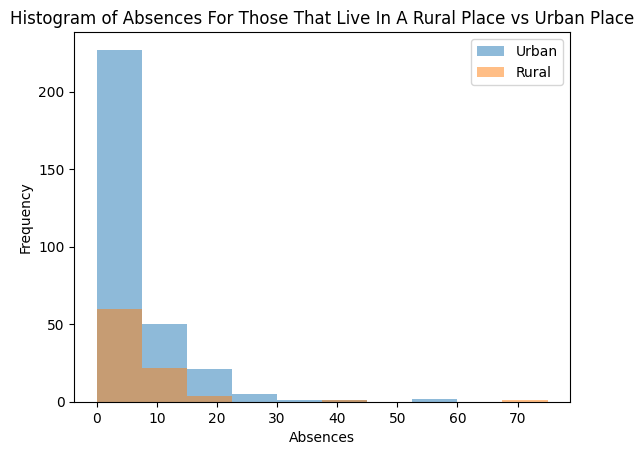

In [152]:
bin_ends = 10
bins = [i*max(student_data.absences)/bin_ends for i in range(0, bin_ends + 1)]
absences_rural = student_data.loc[student_data.address == "Rural", "absences"]
absences_urban = student_data.loc[student_data.address == "Urban", "absences"]
absences_urban.plot.hist(bins = bins, alpha = 0.5, label = "Urban",
                     title = "Histogram of Absences For Those That Live In A Rural Place vs Urban Place")
absences_rural.plot.hist(bins = bins, alpha = 0.5, label = "Rural")
plt.xlabel("Absences")
plt.legend()

From this overlapped histogram, we see that there is a ton of overlap on the absences for both the urban and rural group of students. We also see that there are some extreme outliers for both groups, with the rural group having the higher outliers.

We might also want to examine a histogram of G1 across parental status.

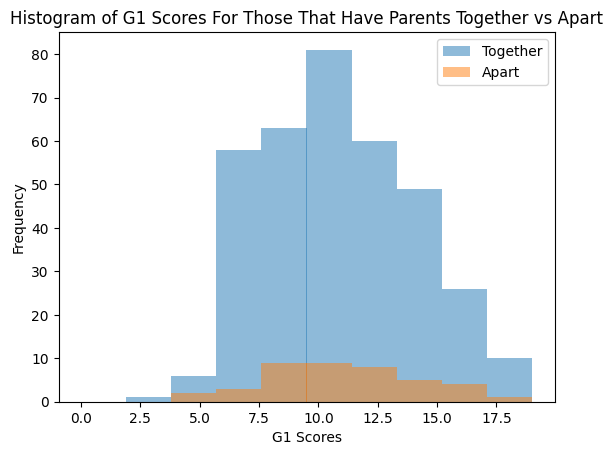

In [158]:
bin_ends = 10
bins = [i*max(student_data.G1)/bin_ends for i in range(0, bin_ends + 1)]
G1_together = student_data.loc[student_data.Pstatus == "Together", "G1"]
G1_apart = student_data.loc[student_data.Pstatus == "Apart", "G1"]
G1_together.plot.hist(bins = bins, alpha = 0.5, label = "Together",
                     title = "Histogram of G1 Scores For Those That Have Parents Together vs Apart")
G1_apart.plot.hist(bins = bins, alpha = 0.5, label = "Apart")
plt.xlabel("G1 Scores")
plt.legend()

Here we see that although there are more students who have parents together, there is still a similar distribution pattern of G1 scores across both groups of students. We also see that there is a peak around a G1 score of 10 for those with parents who are together.

#### Kernel Density Plots

We might also want to look at a kernel density plot to examine the relationship between student's location and their G3 results.

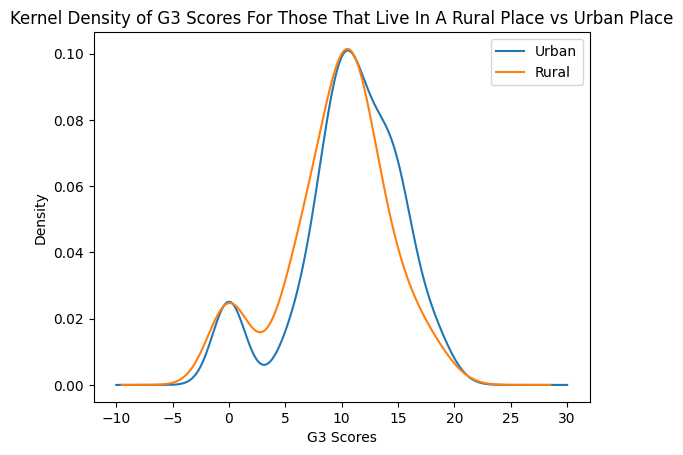

In [143]:
g3_rural = student_data.loc[student_data.address == "Rural", "G3"]
g3_urban = student_data.loc[student_data.address == "Urban", "G3"]
g3_urban.plot.density(label = "Urban",
                     title = "Kernel Density of G3 Scores For Those That Live In A Rural Place vs Urban Place")
g3_rural.plot.density(label = "Rural")
plt.xlabel("G3 Scores")
plt.legend()

From this kernel density plot, we see that across both Rural and Urban based students, there is a similar distribution of G3 scores. Both groups of students have a bimodal distribution with a small peak around a score of 0 and a larger peak abound a score of 10.

We might also want to look at the kernel density of age across parental status.

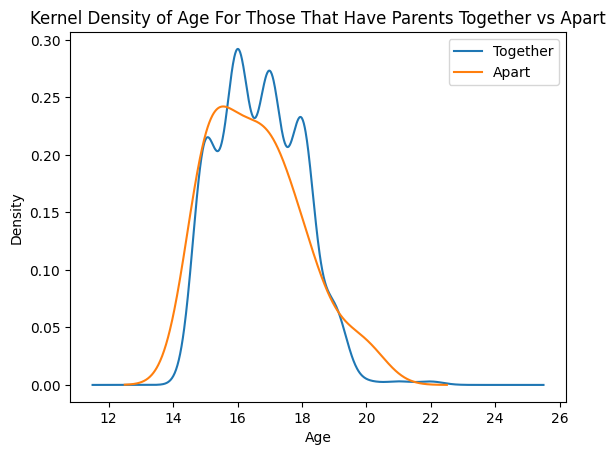

In [159]:
age_together = student_data.loc[student_data.Pstatus == "Together", "age"]
age_apart = student_data.loc[student_data.Pstatus == "Apart", "age"]
age_together.plot.density(label = "Together",
                     title = "Kernel Density of Age For Those That Have Parents Together vs Apart")
age_apart.plot.density(label = "Apart")
plt.xlabel("Age")
plt.legend()

Here we see that Age is a little more wonky with the kernel density, with the graph for students whose parents are together having multiple spikes. For students whose parents are together, we see the largest spike in density around age 15 or 16. The kernel density for those whose parents are apart is a little more smoother, with a semi-peak around 15.

#### Boxplots

We can also look at a boxplot that examines the distribution of the ages for both rural and urban students.

Text(0.5, 1.0, "Boxplot of Age for Those Who Want Higher Education vs Those Who Don't")

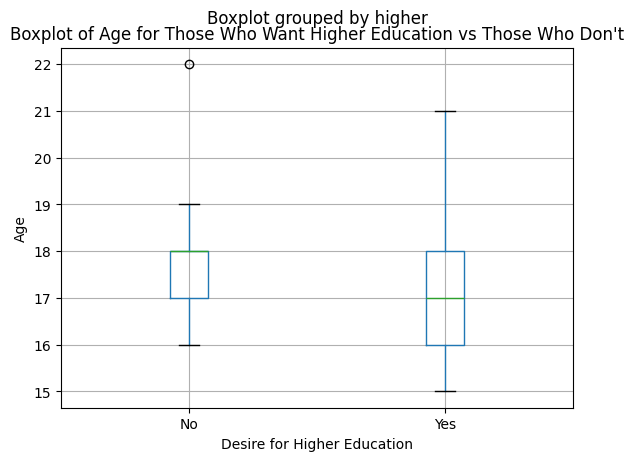

In [149]:
student_data.boxplot(column = ["age"], by = "higher")
plt.xlabel("Desire for Higher Education")
plt.ylabel("Age")
plt.title("Boxplot of Age for Those Who Want Higher Education vs Those Who Don't")

From this boxplot, we see that there is an outlier of a student being 22 and not having a desire for higher education. We also see that those who don't have a higher education have a smaller spread, whereas those who do desire higher education have a larger spread.

We might also want to look at the boxplot for absences across students whose parents are together vs apart.

Text(0.5, 1.0, 'Boxplot of Absences for Those Whose Parents are Together vs Apart')

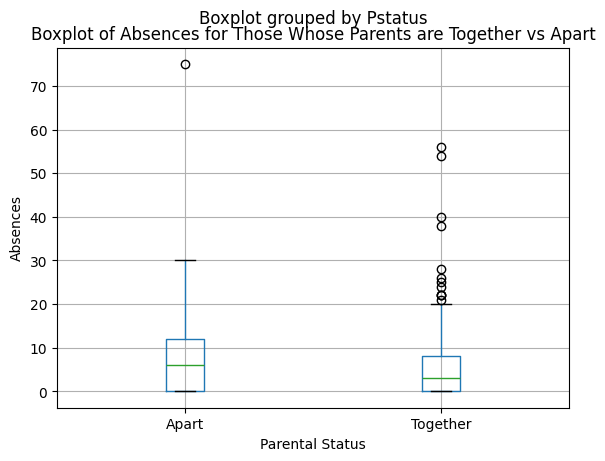

In [160]:
student_data.boxplot(column = ["absences"], by = "Pstatus")
plt.xlabel("Parental Status")
plt.ylabel("Absences")
plt.title("Boxplot of Absences for Those Whose Parents are Together vs Apart")

Her we see a lot more outliers among both groups of students, with one large outlier with a student whose parents that are apart having over 70 absences. For students whose parents are together we see a few outliers above the first quartile of 20 absences, but none are as outrageous as the apart group outlier.

#### Scatterplots

Now we want to look at the scatterplot for G3 and Absences, with a specific interest on whether there is a difference between students whose parents are together vs apart.

Text(0.5, 1.0, 'Scatterplot of Absences and G3 Across Parental Status')

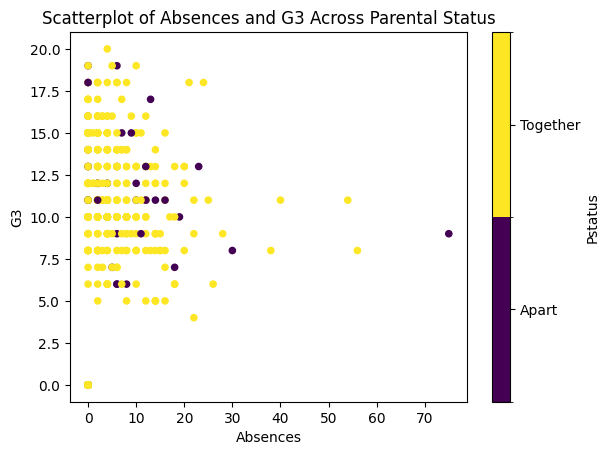

In [162]:
student_data.plot.scatter(x = "absences", y = "G3", c = "Pstatus", cmap = "viridis")
plt.xlabel("Absences")
plt.ylabel("G3")
plt.title("Scatterplot of Absences and G3 Across Parental Status")

One thing that is interesting is that for our strange outlier within the apart group, they surprisingly have a decent G3 score, so one may wonder if they're being diligent outside of school about their school work. Maybe this student is a traveling sport player. We also see that the distribution for both groups are quite similar, with most students having few absences and average G3 scores.

We might also want to compare the G1 and G3 scores among the students desire for higher education.

Text(0.5, 1.0, 'Scatterplot of G1 and G3 Across Desire for Higher Education')

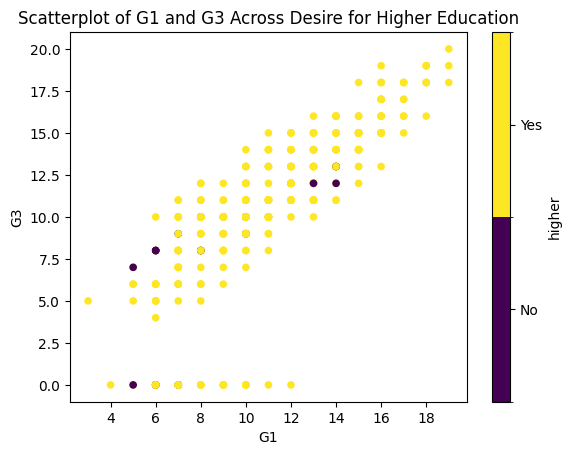

In [163]:
student_data.plot.scatter(x = "G1", y = "G3", c = "higher", cmap = "viridis")
plt.xlabel("G1")
plt.ylabel("G3")
plt.title("Scatterplot of G1 and G3 Across Desire for Higher Education")

In this scatterplot, we see that there is a clear positive linear relationship among both groups between their G1 score and their G3 score. Although there is few data points for students who don't desire higher education, there is still a positive linear relationship among them. This implies that students who have a high G1 score, typically score well in G3.

# Plotting the NFL Data

For this part we’ll read in the NFL Box Score data that we read in class videos.

You may not be familiar with (American) football, but each row of this dataset represents information about
one particular game. The most important thing is the score for the home and away teams (AQ1, . . . , AFinal,
HQ, . . . , HFinal). Other variables like yards gained (passing or rushing or combined) can be good indicators
of score. Things like turnovers, penalties, etc. can also be indicators of how the game went.

## Task 1: Reading in the data

Here we will read in the NFL Box Score data with the URL.

In [164]:
import pandas as pd
scores = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
scores.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


We want to convert the `homeTeam`, `awayTeam`, `day`, `stadium`, `startTime`, `toss`, `roof`, and `surface` to category
type variables.

Here we can repeat our process from the Student Data problem by using the `.apply()` method with a `lambda` function.


In [166]:
scores[["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]] = scores[["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]]\
    .apply(lambda x: x.astype("category"))
scores.info() #check that the variables got converted to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3471 entries, 0 to 3470
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   week             3471 non-null   object  
 1   date             3471 non-null   object  
 2   day              3471 non-null   category
 3   season           3471 non-null   int64   
 4   awayTeam         3471 non-null   category
 5   AQ1              3471 non-null   int64   
 6   AQ2              3471 non-null   int64   
 7   AQ3              3471 non-null   int64   
 8   AQ4              3471 non-null   int64   
 9   AOT              3471 non-null   int64   
 10  AOT2             3471 non-null   int64   
 11  AFinal           3471 non-null   int64   
 12  homeTeam         3471 non-null   category
 13  HQ1              3471 non-null   int64   
 14  HQ2              3471 non-null   int64   
 15  HQ3              3471 non-null   int64   
 16  HQ4              3471 non-null   int64   


## Task 2: Summarize the Data

We only want to examine the trends during the regular season. That is, we will only focus on games played during week 1 through week 17.

First we want to see what values of `week` there are.

In [180]:
scores["week"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', 'WildCard', 'Division', 'ConfChamp',
       'SuperBowl'], dtype=object)

Now we want to take out all of the games that aren't considered a regular season game. Once we have the regular season games, we want the weeks to be converted to an integer type.

In [184]:
reg_season = scores.loc[(scores["week"] != "WildCard") &
                        (scores["week"] != "Division") &
                        (scores["week"] != "ConfChamp") &
                        (scores["week"] != "SuperBowl")].copy()

reg_season["weekNum"] = reg_season["week"].astype(int)
reg_season.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread,weekNum
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,10,80,4,8,0,1,32.47,-3,-4.0,1
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,4,33,2,6,0,0,28.48,4,4.5,1
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,8,85,1,6,0,1,31.48,-6,6.0,1
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,10,82,4,8,2,2,39.13,-6,-3.0,1
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,7,56,6,10,1,2,34.40,8,6.0,1


### Numerical Summaries

Now we want to look at some numerical summaries of our `reg_season` data. First we'll look at `AFinal` and `HFinal` grouped by season and week.

In [187]:
reg_season.groupby(["season", "week"])[["AFinal", "HFinal"]].describe()

AFinal                                                       \
             count       mean        std  min    25%   50%    75%   max   
season week                                                               
2002   1      16.0  23.125000   9.680737  7.0  16.00  23.0  29.50  40.0   
       10     14.0  23.500000  10.478917  7.0  13.25  27.0  33.75  35.0   
       11     16.0  18.375000   7.864477  3.0  15.50  17.0  23.25  31.0   
       12     16.0  21.187500  11.513579  3.0  13.75  18.0  26.00  41.0   
       13     16.0  19.062500   9.650345  0.0  18.25  20.0  25.50  32.0   
...            ...        ...        ...  ...    ...   ...    ...   ...   
2014   5      15.0  19.133333   8.078779  0.0  17.00  17.0  25.50  31.0   
       6      15.0  26.200000  12.131423  0.0  18.50  30.0  32.00  48.0   
       7      15.0  18.133333   8.061076  0.0  16.50  21.0  23.50  27.0   
       8      15.0  22.600000   8.781474  7.0  19.50  22.0  25.50  43.0   
       9      13.0  21.846154  10.139413  0.0  17.00  23.0  28.00  40.0   

            HFinal                                                        
             count       mean        std   min    25%   50%    75%   max  
season week                                                               
2002   1      16.0  26.125000  11.050641   6.0  19.75  27.0  31.00  49.0  
       10     14.0  22.571429  10.580928   6.0  14.00  22.0  29.50  40.0  
       11     16.0  22.562500   7.023473   9.0  19.75  21.0  26.25  38.0  
       12     16.0  21.000000   8.809086   0.0  16.75  20.0  25.25  39.0  
       13     16.0  25.000000  10.507140   6.0  22.00  25.0  30.00  49.0  
...            ...        ...        ...   ...    ...   ...    ...   ...  
2014   5      15.0  27.933333  10.592900   9.0  20.00  30.0  35.50  43.0  
       6      15.0  22.200000   8.554030   3.0  17.00  23.0  28.00  37.0  
       7      15.0  25.533333   8.192912  13.0  19.50  27.0  29.50  42.0  
       8      15.0  26.733333  13.540767   9.0  16.50  23.0  34.50  51.0  
       9      13.0  26.384615  10.851563  10.0  21.00  24.0  33.00  43.0  

[221 rows x 16 columns]

Now we can examine how `AFinal` and `HFinal` compare when grouped just by the `season`.

In [189]:
reg_season.groupby("season")[["AFinal", "HFinal"]].describe()

AFinal                                                     HFinal  \
        count       mean        std  min   25%   50%    75%   max  count   
season                                                                     
2002    256.0  20.550781  10.064759  0.0  13.0  20.5  27.00  49.0  256.0   
2003    256.0  19.054688  10.251970  0.0  13.0  19.0  24.25  55.0  256.0   
2004    256.0  20.230469  10.175596  0.0  13.0  19.0  27.00  49.0  256.0   
2005    256.0  18.792969   9.948894  0.0  10.0  19.0  24.00  45.0  256.0   
2006    256.0  20.234375  10.386254  0.0  13.0  21.0  27.00  49.0  256.0   
2007    256.0  20.253906  10.703215  0.0  13.0  20.0  28.00  56.0  256.0   
2008    256.0  20.750000  10.420944  0.0  13.0  20.0  27.00  54.0  256.0   
2009    256.0  20.363281  10.672526  0.0  13.0  20.0  27.00  48.0  256.0   
2010    256.0  21.089844  10.288187  0.0  14.0  20.0  27.25  59.0  256.0   
2011    256.0  20.546875   9.634789  0.0  14.0  20.0  27.00  45.0  256.0   
2012    256.0  21.539062  10.404676  0.0  13.0  21.5  27.25  52.0  256.0   
2013    256.0  21.855469   9.664500  0.0  16.0  21.0  27.00  56.0  256.0   
2014    256.0  21.343750   9.877634  0.0  14.0  21.0  27.00  48.0  256.0   

                                                             
             mean        std  min    25%   50%    75%   max  
season                                                       
2002    22.796875  10.182152  0.0  16.00  23.0  30.00  52.0  
2003    22.609375  10.119470  0.0  16.00  23.0  28.00  50.0  
2004    22.738281  10.400502  0.0  15.75  23.0  30.00  58.0  
2005    22.441406   9.797383  0.0  16.00  21.0  28.00  52.0  
2006    21.082031   9.856475  0.0  14.00  20.0  27.00  48.0  
2007    23.121094  10.568033  3.0  16.00  22.0  31.00  56.0  
2008    23.308594  10.454499  0.0  16.00  24.0  31.00  56.0  
2009    22.570312  10.666557  0.0  16.00  23.0  30.00  59.0  
2010    22.984375  10.251339  0.0  14.00  23.0  31.00  49.0  
2011    23.812500  10.524109  0.0  17.00  23.0  30.25  62.0  
2012    23.972656  10.559413  0.0  17.00  23.0  31.00  59.0  
2013    24.960938  10.533534  0.0  19.00  24.0  31.00  55.0  
2014    23.832031  10.954053  0.0  17.00  23.0  30.25  56.0

We can then look at how `AFinal` and `HFinal` compare when grouped just by `week`.

In [190]:
reg_season.groupby("week")[["AFinal", "HFinal"]].describe()

AFinal                                                      HFinal  \
      count       mean        std  min    25%   50%    75%   max  count   
week                                                                      
1     208.0  19.716346   8.977768  0.0  13.00  20.0  26.00  41.0  208.0   
10    186.0  21.543011  10.015705  0.0  15.25  21.0  27.00  59.0  186.0   
11    201.0  19.592040  10.017122  0.0  13.00  19.0  27.00  56.0  201.0   
12    205.0  21.507317  10.795160  0.0  13.00  21.0  28.00  54.0  205.0   
13    208.0  20.437500  10.131786  0.0  13.00  20.0  27.00  47.0  208.0   
14    208.0  19.394231  10.203171  0.0  10.00  20.0  27.00  49.0  208.0   
15    208.0  20.942308  11.224393  0.0  13.00  20.0  28.00  56.0  208.0   
16    208.0  20.802885  10.330041  0.0  13.00  20.0  28.00  44.0  208.0   
17    208.0  19.235577  10.637064  0.0  10.00  19.0  26.00  44.0  208.0   
2     207.0  19.545894  10.433170  0.0  10.00  20.0  27.00  48.0  207.0   
3     198.0  20.767677   9.634781  0.0  13.00  23.0  27.00  44.0  198.0   
4     184.0  20.983696  10.062361  0.0  14.00  20.0  27.25  55.0  184.0   
5     182.0  20.527473  10.300824  0.0  13.00  20.5  27.00  51.0  182.0   
6     181.0  20.679558  10.270079  0.0  14.00  20.0  27.00  48.0  181.0   
7     180.0  21.111111  10.674927  0.0  14.00  20.0  27.00  59.0  180.0   
8     178.0  20.151685   9.782639  0.0  13.00  20.0  27.00  45.0  178.0   
9     178.0  22.146067   9.701244  0.0  16.00  23.0  28.00  51.0  178.0   

                                                           
           mean        std  min    25%   50%    75%   max  
week                                                       
1     22.139423  10.595541  0.0  14.00  20.5  30.00  49.0  
10    22.983871  10.753491  0.0  14.00  23.0  30.00  55.0  
11    22.582090  10.326397  0.0  15.00  22.0  30.00  59.0  
12    22.878049  10.035220  0.0  17.00  21.0  28.00  58.0  
13    23.201923  10.579700  0.0  16.00  23.0  31.00  52.0  
14    24.605769  11.453682  0.0  16.00  24.0  31.00  58.0  
15    22.543269  10.288498  0.0  15.00  21.0  30.00  51.0  
16    22.168269  11.019331  0.0  14.75  21.0  28.00  55.0  
17    23.807692  10.339247  0.0  17.00  23.0  31.00  52.0  
2     22.840580   9.842384  0.0  15.50  23.0  30.00  51.0  
3     22.646465  10.153955  0.0  16.00  23.0  30.00  56.0  
4     24.092391  10.874704  0.0  16.00  23.0  31.25  56.0  
5     24.324176  10.158379  3.0  17.00  24.0  31.00  52.0  
6     22.988950   9.254422  3.0  17.00  23.0  28.00  59.0  
7     23.338889  10.948924  0.0  16.00  23.0  30.00  62.0  
8     23.359551  10.573121  0.0  16.00  23.0  30.00  52.0  
9     22.258427   9.152849  0.0  17.00  21.5  27.00  55.0

### Graphical Summaries

We then want to look at some graphical summaries over time. We might want to see how the median changes over the `season` for the `AFinal` and `HFinal` variables, as the mean may be more skewed due to potential outlier scores.

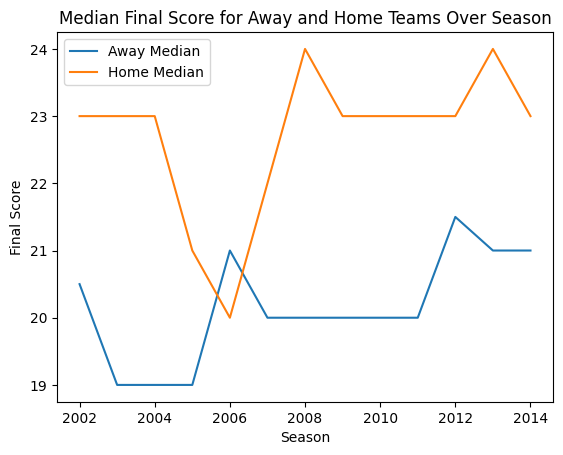

In [196]:
away_season_median = reg_season.groupby("season")["AFinal"].median()
home_season_median = reg_season.groupby("season")["HFinal"].median()

plt.plot(away_season_median, label = "Away Median")
plt.plot(home_season_median, label = "Home Median")
plt.xlabel("Season")
plt.ylabel("Final Score")
plt.title("Median Final Score for Away and Home Teams Over Season")
plt.legend()

Here we see that the Home Team appears to have a higher median score, when the scores are grouped by the season. However, there appears to be a distinct dip in 2006 where the Away Team had a higher median score.

We might want to examine the mean, to see if there are any outliers that may be impacting the Final Score for either team.

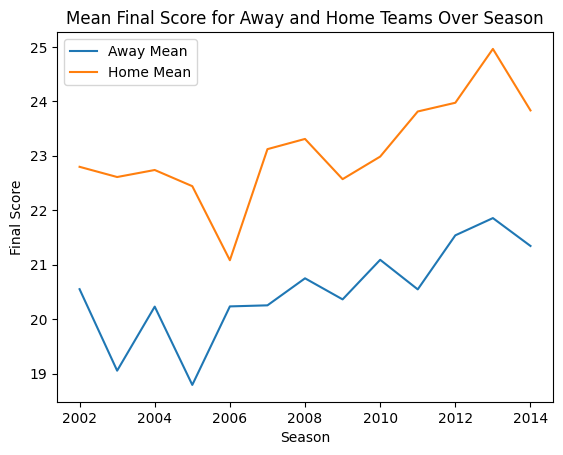

In [195]:
away_season_mean = reg_season.groupby("season")["AFinal"].mean()
home_season_mean = reg_season.groupby("season")["HFinal"].mean()

plt.plot(away_season_mean, label = "Away Mean")
plt.plot(home_season_mean, label = "Home Mean")
plt.xlabel("Season")
plt.ylabel("Final Score")
plt.title("Mean Final Score for Away and Home Teams Over Season")
plt.legend()

Here we see that when summarizing by mean, we notice a different trend among the season grouping, particularly for the 2006 season. While in the median summary we saw that the Away Team had a higher median Final Score, here for the mean summary the Home Team continues to have a higher score on average across the seasons. This implies that there may be an outlier game during the 2006 season that could be worth investigating.

We might want to see if this mean graph changes even more if we grouped by `week`.

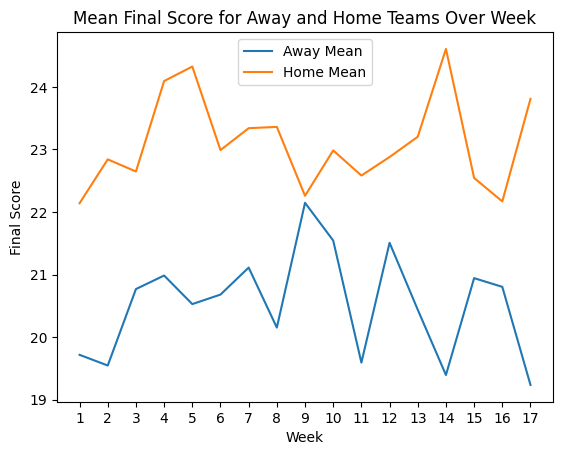

In [205]:
away_week_mean = reg_season.groupby("weekNum")["AFinal"].mean()
home_week_mean = reg_season.groupby("weekNum")["HFinal"].mean()

plt.plot(away_week_mean, label = "Away Mean")
plt.plot(home_week_mean, label = "Home Mean")
plt.xlabel("Week")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
            11 ,12, 13, 14, 15, 16, 17])
plt.ylabel("Final Score")
plt.title("Mean Final Score for Away and Home Teams Over Week")
plt.legend()

Now we see that when we examine the mean Final Score with `week` as the grouping, we notice that week 9 appears to be the closest week between the Home and Away Teams Final Scores. The remaining weeks appear to show that the Home Team clearly has a home field advantage.

### Graphing Function

We will now write a function that will allow us to easily create a plot with this data.

We might want to know how long it takes for the code to run when creating these plots. This can be done by using the `timeit()` decorator function from the course notes.

In [206]:
import time
from functools import wraps

def timeit(func):
        @wraps(func)
        def wrapper(*args, **kwards):
            start = time.perf_counter()
            result = func(*args, **kwards)
            end = time.perf_counter()
            elapsed = end - start
            print(f'{func.__name__} ran in {elapsed:0.6f} seconds')
        return wrapper

Now we can create our function of interest that outputs a plot based on our provided arguments. Please read the *docstring* for additional information about the function and the required arguments.

In [212]:
@timeit

# Function assumes numpy, pandas, and matplotlib are already imported, if not be sure to import them
def plot_NFL(num_var: str, cat_var: str, stat: str, df: pd.DataFrame):

    '''
    This function takes in a pandas DataFrame, a numeric variable, a categorical variable, and a statistic of choice to
    create a bar graph or line plot with all of these components.

    num_var = a numeric variable from the DataFrame
    cat_var = a categorical variable from the DataFrame. This cat_var must be a category type variable.
    stat = a statistic to summarize your num_var, that will be plotted across the cat_var.
            MUST BE ONE OF THE FOLLOWING:
                  - mean
                  - median
                  - std
                  - var
                  - min
                  - max
    df = a DataFrame of the NFL regular season data

    Returns a bar graph or line plot of the statisitic (stat) for the num_var, plotted across the cat_var.
    '''

    if num_var not in ['AQ1', 'AQ2', 'AQ3', 'AQ4', 'AOT', 'AOT2', 'AFinal',
                       'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HOT', 'HOT2', 'HFinal',
                       'AfirstDowns', 'AnetPassYds', 'AtotalYds', 'Aturnovers', 'AtotalPlays',
                       'HfirstDowns', 'HnetPassYds', 'HtotalYds', 'Hturnovers', 'HtotalPlays',
                       'awayRushAtt', 'awayRushYds', 'awayRushTD', 'awayPassComp', 'awayPassAtt',
                       'awayPassYds', 'awayPassTD', 'awayPassInt', 'awayTimesSacked',
                       'awaySackYdsLost', 'awayFum', 'awayFumLost', 'awayNumPen', 'awayPenYds',
                       'away3rdConv', 'away3rdAtt', 'away4thConv', 'away4thAtt', 'awayTOP',
                       'homeRushAtt', 'homeRushYds', 'homeRushTD', 'homePassComp', 'homePassAtt',
                       'homePassYds', 'homePassTD', 'homePassInt', 'homeTimesSacked',
                       'homeSackYdsLost', 'homeFum', 'homeFumLost', 'homeNumPen', 'homePenYds',
                       'home3rdConv', 'home3rdAtt', 'home4thConv', 'home4thAtt', 'homeTOP',
                       'HminusAScore', 'homeSpread']:
        raise Exception("Invalid num_var supplied. Please try again.")

    if cat_var not in ["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface", "season", "weekNum"]:
        raise Exception("Invalid cat_var supplied. Please try again.")

    if stat not in ['mean', 'median', 'std', 'var', 'min', 'max']:
        raise Exception("Invalid stat supplied. Please try again.")

    # Create an object that groups by the cat_var, and summarized the num_var by the provided stat
    df_summary = df.groupby(cat_var, observed = True)[num_var].agg(stat)

    # Look at cat_var to see if it is season, , or startTime
    if cat_var in ["season", "weekNum", "startTime"]:
        plt.plot(df_summary.index, df_summary.values) #grabs the index for the x-axis and the values for the y-axis
        plt.title(f"{stat} of {num_var} by {cat_var}")
        plt.xlabel(cat_var)
        plt.ylabel(f"{stat} of {num_var}")
    else:
        df_summary.plot.bar()
        plt.title(f"{stat} of {num_var} by {cat_var}")
        plt.xlabel(cat_var)
        plt.ylabel(f"{stat} of {num_var}")



Now that we built our function we can test it out.

#### Example 1

We first might want to test our `plot_NFL` function with:

- num_var: `HfirstDowns`
- cat_var: `homeTeam`
- stat: mean

This plot will allow us to see which team gets the most first downs, on average, when playing as the Home Team.


plot_NFL ran in 0.078477 seconds


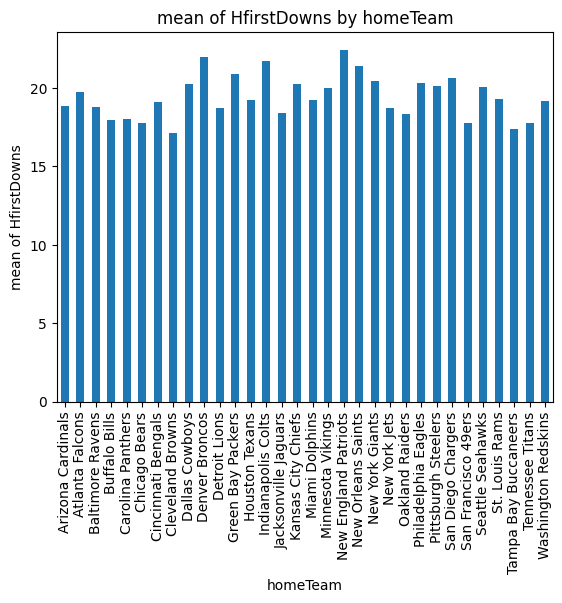

In [213]:
plot_NFL("HfirstDowns", "homeTeam", "mean", reg_season)

From this graph we see that the New England Patriots have the highest mean for first downs as the home team, whereas the Cleveland Browns and St. Louis Rams appear to have the smallest means.

#### Example 2

Next we can look at running our function for the following combination:
- num_var: `awayTimesSacked`
- cat_var: `awayTeam`
- stat: median

This will allow us to see which teams get sacked the most or least, in respect to their median, when playing as the Away Team.

plot_NFL ran in 0.083941 seconds


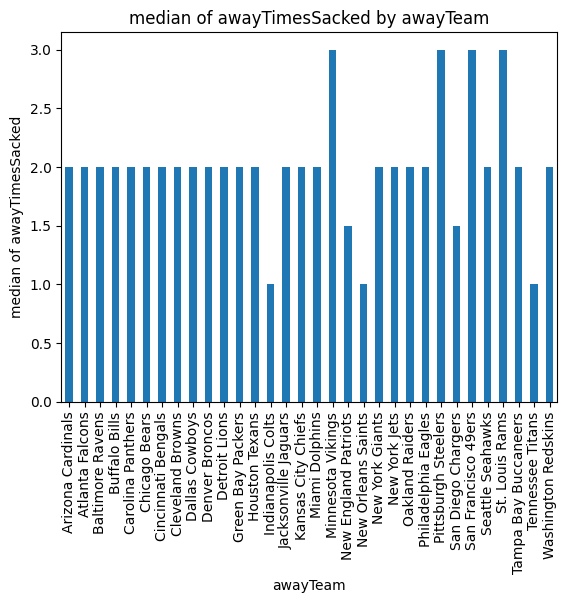

In [215]:
plot_NFL("awayTimesSacked", "awayTeam", "median", reg_season)

From this graph we see that the Minnesota Vikings, the Pittsburgh Steelers, San Francisco 49ers, and the St. Louis Rams all have a median of 3 sacks indicating that their QB and Offence may struggle when it comes to mitigating a sack.

#### Example 3

Finally, we can try one more plot with our `plot_NFL` function with the following combo:
- num_var: HtotalYds
- cat_var: season
- stat: max

This graph will allow us to examine the highest, or maximum, total yards for the Home Team per season.

plot_NFL ran in 0.113834 seconds


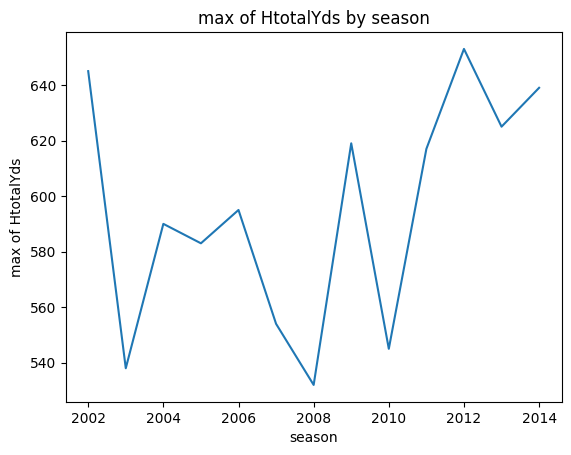

In [216]:
plot_NFL("HtotalYds", "season", "max", reg_season)

From this graph we see that in the 2012 season, there was an all time high for the most total yards completed by the home team. We may want to look further into the data to see which team achieved this feat. On the other hand, the 2008 season had one of the lower performing total yards among the home team. Maybe the 2008 recession impacted the NFL and led the teams to have less energy to get a high amount of total yards.